INSTALLING PACKAGES

In [2]:

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip3 install torchtext
!pip3 install torchvision
!pip3 install --no-cache-dir -I pillow


tcmalloc: large alloc 1073750016 bytes == 0x58678000 @  0x7f6ae9a502a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 71kB 4.6MB/s 
    100% |████████████████████████████████| 2.0MB 38.3MB/s 


DOWNLOAD DATA

In [3]:

import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
import zipfile


train_path = 'train'
dl_file = 'dl2018-image-proj.zip'
dl_url = 'https://users.aalto.fi/mvsjober/misc/'

zip_path = os.path.join(train_path, dl_file)
if not os.path.isfile(zip_path):
    download_url(dl_url + dl_file, root=train_path, filename=dl_file, md5=None)

with zipfile.ZipFile(zip_path) as zip_f:
    zip_f.extractall(train_path)
    
    #os.unlink(zip_path)

In [2]:
!ls train/images/im1.jpg

train/images/im1.jpg


In [0]:
PATH = "train/images/"

In [0]:
# workaround 
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
print(PIL.PILLOW_VERSION)

5.3.0


In [14]:
img=mpimg.imread(f'{PATH}/im1.jpg')
imgplot = plt.imshow(img)
plt.show()

im = cv2.imread(f'{PATH}/im1.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

NameError: ignored

Image functions

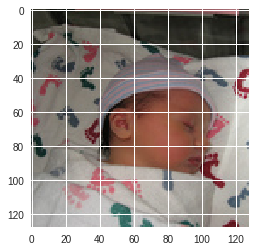

In [7]:
#by path
def plot_imgname(name):
  img=mpimg.imread(f'{PATH}{name}.jpg')
  imgplot = plt.imshow(img)
  plt.show()

plot_imgname('im185')

#check if grayscale
def is_grey_scale(path):
    
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

def plot_image(tensor):
  if tensor.shape[0] == 3:
    x = tensor.permute(1,2,0).data.numpy()
    plt.imshow(x)
  elif tensor.shape[0] == 1:
    x = tensor.permute(1,2,0).squeeze(2).data.numpy()
    plt.imshow(x, cmap='gray')

In [0]:
# check all the classes

from os import listdir
from os.path import isfile, join
classes = [f[:-4] for f in listdir('train/annotations/') if isfile(join('train/annotations/', f))]

In [9]:
classes

['portrait',
 'car',
 'clouds',
 'night',
 'baby',
 'river',
 'female',
 'tree',
 'male',
 'dog',
 'flower',
 'bird',
 'people',
 'sea']

In [0]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [0]:
# distribution of the classes
path='train/annotations/'

dist = dict([(f'{f[:-4]}',file_len(f'{path}{f}')) for f in listdir(path) if isfile(join(path, f))])
            
            

In [12]:
dist

{'baby': 95,
 'bird': 360,
 'car': 319,
 'clouds': 1095,
 'dog': 448,
 'female': 3227,
 'flower': 761,
 'male': 2979,
 'night': 598,
 'people': 6403,
 'portrait': 3121,
 'river': 120,
 'sea': 173,
 'tree': 525}

<Container object of 14 artists>

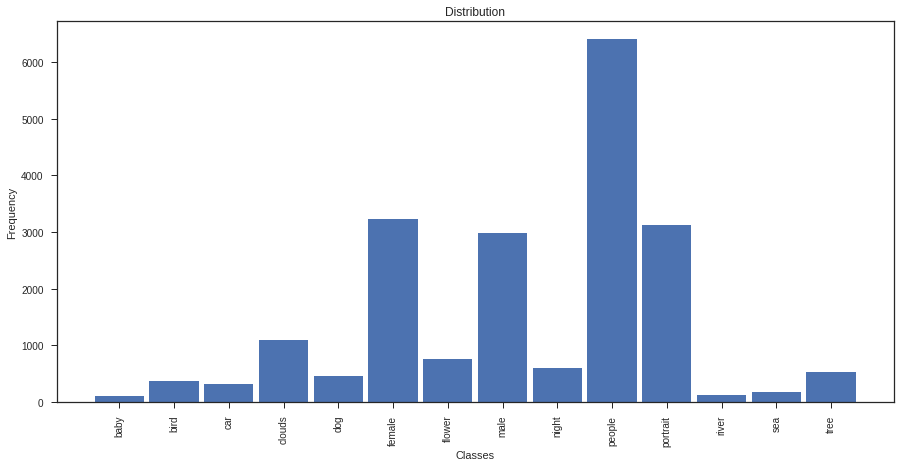

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Classes")
plt.title(f"Distribution")
plt.bar(dist.keys(), dist.values(), width=0.9, color='b')

In [14]:
# sort all the images from im1....imn
file_col = listdir("train/images")
list1 = [int(x[2:len(x)-4]) for x in file_col]
list1.sort()
listfin = ["train/images/im"+str(num)+".jpg" for num in list1]

file_col = pd.Series(listfin)

# creation of the dataframe 
df = pd.DataFrame()
df["fileName"] = file_col

path = "train/annotations"

row = 0

# file dic contains how many samples there are for each class. Is it needed?
file_dic = {}

for label, filename in enumerate(listdir(path)):
  # array of zeros (20000,) that will be one column of the df
  tmp = np.zeros(file_col.shape[0], dtype=int)
  with open(path+"/"+filename, "r") as file:
    file_len = 0
    for line in file:
      # get the line that contains that image
      line = line.replace("\n", "")
      line = int(line)
      tmp[line-1] = 1   # set 1 for the image that contains that class 
      file_len = file_len + 1
  filename = filename[:-4]
  tmp = pd.Series(tmp)
  df[filename] = tmp
  file_dic[filename] = file_len

print(file_dic)

{'portrait': 3121, 'car': 319, 'clouds': 1095, 'night': 598, 'baby': 95, 'river': 120, 'female': 3227, 'tree': 525, 'male': 2979, 'dog': 448, 'flower': 761, 'bird': 360, 'people': 6403, 'sea': 173}


In [15]:
df.shape

(20000, 15)

In [16]:
df.head()


,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,train/images/im2.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,train/images/im3.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
# displaying inline pandas images
import glob
import random
import base64
from io import BytesIO
from IPython.display import HTML

pd.set_option('display.max_colwidth', -1)

# put the PIL image in the df

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i
  
def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df['image'] = df.fileName.map(lambda f: get_thumbnail(f))
df.head()

,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea,image
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7755889CC0>
1,train/images/im2.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7753E972E8>
2,train/images/im3.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7753E97390>
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7753E97438>
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7753E974E0>


In [18]:
df.shape

(20000, 16)

In [0]:
def vec2label (df):
  l = []
  for i in range(df.shape[0]):
    p = []
    for k in df.columns[1:-1]:
      if df.loc[i][f'{k}']:
        p.append(k)
    l.append(p)
  l = pd.Series(l)
  return l

df['classes']= vec2label(df)

In [20]:
df.shape

(20000, 17)

,fileName,image,classes
0,train/images/im1.jpg,,"[portrait, female, people]"
1,train/images/im2.jpg,,[]
2,train/images/im3.jpg,,[]
3,train/images/im4.jpg,,"[male, people]"
4,train/images/im5.jpg,,"[male, people]"
5,train/images/im6.jpg,,[]
6,train/images/im7.jpg,,"[female, people]"
7,train/images/im8.jpg,,[]
8,train/images/im9.jpg,,[]
9,train/images/im10.jpg,,[]

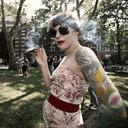
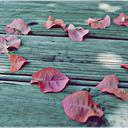
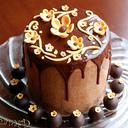
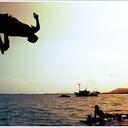
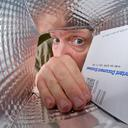
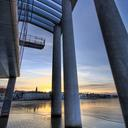
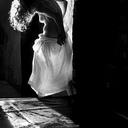
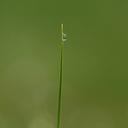
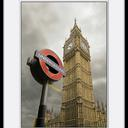
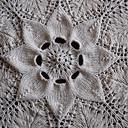
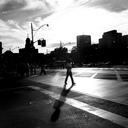
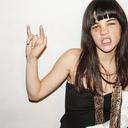
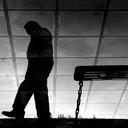
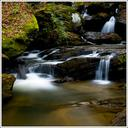
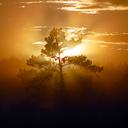
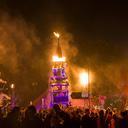
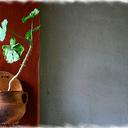
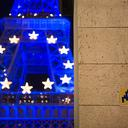
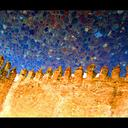
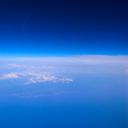

In [21]:
HTML(df[['fileName', 'image','classes']].head(20).to_html(formatters={'image': image_formatter}, escape=False))

In [22]:
mask = df['classes'].astype(str) == '[]' 
missing_values = sum(mask)
print("missing values:", missing_values)

missing values: 9824


In [23]:
# percentage of images without class
print((missing_values/20000)*100)

49.120000000000005


In [24]:
# delete all the values without target
df = df[~mask]
df.head()

,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea,image,classes
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7755889CC0>,"[portrait, female, people]"
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7753E97438>,"[male, people]"
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7753E974E0>,"[male, people]"
6,train/images/im7.jpg,0,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7F7753E97630>,"[female, people]"
10,train/images/im11.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7F7753E978D0>,"[male, people]"


In [0]:
df.to_csv("data.csv")

In [26]:
df.head()

,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea,image,classes
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7755889CC0>,"[portrait, female, people]"
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7753E97438>,"[male, people]"
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F7753E974E0>,"[male, people]"
6,train/images/im7.jpg,0,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7F7753E97630>,"[female, people]"
10,train/images/im11.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7F7753E978D0>,"[male, people]"


In [27]:
print(df.iloc[0,0])

train/images/im1.jpg


In [0]:
# PREPARING THE DATALOADER
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings ?
import warnings
warnings.filterwarnings("ignore")
import operator

class ImageDataset:
  def __init__ (self, csv_file, transformations=None):
    self.data_frame = pd.read_csv(csv_file)
    self.data_frame=self.data_frame.drop(['Unnamed: 0'], axis=1)
    self.to_tensor = transforms.ToTensor()
    # for data augmentation
    self.transformations = transformations
      
  
  def __len__(self):
        return len(self.data_frame)
   
  def __getitem__(self, idx):
    
    # Get image name from the pandas df
    single_image_name = self.data_frame.iloc[idx,0]
    
    # Open image
    img_as_img = Image.open(single_image_name).convert("RGB")
    
    if self.transformations:
      img_as_img = self.transformations(img_as_img)

    # Transform image to tensor
    img_as_tensor = self.to_tensor(img_as_img)
    
    labels = np.asarray(self.data_frame.iloc[idx,1:-2], dtype=np.int16)
    labels_classes = self.data_frame.iloc[idx,16]
    sample = dict({'image': img_as_tensor, 'labels': labels, 'classes':labels_classes})
    return (sample)
  
  
        
    


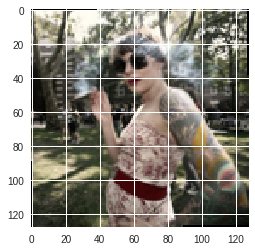

In [17]:
tfs = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
])

image_dataset = ImageDataset("data.csv", tfs)
plot_image(image_dataset.__getitem__(0)['image'])


0 torch.Size([3, 128, 128]) ['portrait', 'female', 'people']
1 torch.Size([3, 128, 128]) ['male', 'people']
2 torch.Size([3, 128, 128]) ['male', 'people']
3 torch.Size([3, 128, 128]) ['female', 'people']
4 torch.Size([3, 128, 128]) ['male', 'people']


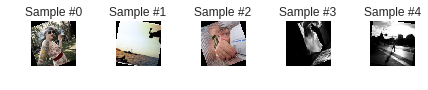

In [18]:
fig = plt.figure()

for i in range(len(image_dataset)):
    sample = image_dataset[i]
    print(i, sample['image'].shape, sample['classes'])
    
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plot_image(sample['image'])
   
    if i == 4:
        plt.show()
        break

In [31]:
image_dataset.__getitem__(1)

{'classes': "['male', 'people']",
 'image': tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.9882, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.9882, 0.0000, 0.0000],
          [0.8745, 0.8784, 0.8784,  ..., 0.9922, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.2039,  ..., 0.8627, 0.8627, 0.8588],
          [0.0000, 0.0000, 0.1490,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.3529,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.9922, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.9922, 0.0000, 0.0000],
          [0.8627, 0.8667, 0.8667,  ..., 0.9961, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.2667,  ..., 0.8353, 0.8510, 0.8549],
          [0.0000, 0.0000, 0.2235,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.4275,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.9961, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.9961, 0.0000, 0.0000

split training and test set 90-10 split

In [19]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1)
'''
train_data.index = range(len(train_data.index))
test_data.index = range(len(test_data.index))
'''
test_data.to_csv('./test.csv')
train_data.to_csv('./train.csv')


NameError: ignored

In [20]:
train_dataset = ImageDataset("train.csv")
test_dataset = ImageDataset("test.csv")

dataloader = DataLoader(image_dataset, batch_size=32, shuffle=True, num_workers=4)
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['classes'])

    # observe 4th batch and stop.
    if i_batch == 3:
      break

0 torch.Size([32, 3, 128, 128]) ["['portrait', 'female', 'people']", "['clouds']", "['portrait', 'female', 'people']", "['portrait', 'female', 'male', 'people']", "['clouds']", "['people']", "['clouds']", "['male']", "['people']", "['male', 'people']", "['portrait', 'female', 'people']", "['female', 'dog', 'people']", "['female', 'male', 'people']", "['portrait', 'male', 'people']", "['female', 'male', 'people']", "['male', 'people']", "['people']", "['portrait', 'male', 'people']", "['night']", "['people']", "['dog']", "['female', 'people']", "['tree', 'flower']", "['clouds']", "['male', 'people']", "['female', 'male', 'people']", "['male', 'people']", "['female', 'people']", "['portrait', 'female', 'people']", "['portrait', 'male', 'people']", "['night']", "['male', 'people']"]
1 torch.Size([32, 3, 128, 128]) ["['female', 'male', 'people']", "['flower']", "['portrait', 'male', 'people']", "['night']", "['portrait', 'female', 'people']", "['people']", "['flower']", "['night']", "['por

In [21]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True,num_workers=4)
validation_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False,num_workers=4)

for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['classes'])

    # observe 4th batch and stop.
    if i_batch == 3:
      break

0 torch.Size([32, 3, 128, 128]) ["['male', 'people']", "['female', 'male', 'people']", "['tree']", "['tree']", "['clouds']", "['portrait', 'female', 'people']", "['portrait', 'male', 'people']", "['portrait', 'female', 'people']", "['night', 'tree']", "['male', 'people']", "['bird']", "['portrait', 'female', 'people']", "['female', 'people']", "['clouds']", "['tree']", "['clouds']", "['flower']", "['portrait', 'female', 'people']", "['portrait', 'male', 'people']", "['night']", "['portrait', 'female', 'dog', 'people']", "['portrait', 'female', 'male', 'people']", "['male', 'people']", "['male', 'people']", "['portrait', 'female', 'male', 'people']", "['portrait', 'baby', 'male', 'people']", "['male', 'people']", "['portrait', 'female', 'male', 'people']", "['male', 'people']", "['clouds']", "['portrait', 'female', 'people']", "['portrait', 'female', 'people']"]
1 torch.Size([32, 3, 128, 128]) ["['portrait', 'female', 'male', 'people']", "['male', 'people']", "['sea']", "['portrait', 'm

In [35]:
!mkdir train, test

mkdir: cannot create directory ‘train,’: File exists
mkdir: cannot create directory ‘test’: File exists


In [0]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
         # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0)
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0)
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)  
        self.dropout = nn.Dropout(p=0.5)
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32*30*30, 14)
     
    def forward(self, x):
        # Convolution 1
        out = F.relu(self.cnn1(x))
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = F.relu(self.cnn2(out))
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        # Linear function (readout)
        out = self.fc1(out)
        
        return out
    


In [0]:
def train(train_loss, epoch, log_interval=100):
    model.train()
    loss_temp=0
    for batch_idx, databatch in enumerate(train_loader):
        data = databatch['image'].cuda().float()
        target = databatch['labels'].cuda().float()
        optimizer.zero_grad() 
        output = model(data)
        loss = criterion(output, target)
        loss_temp+=loss
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
        
    train_loss.append(loss_temp/len(train_loader))
    
    
    


def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for databatch in (validation_loader):
        data = databatch['image'].cuda().float()
        target = databatch['labels'].cuda().float()
        output = model(data)
        # print (output,output.shape)
        val_loss += criterion(output, target).data.item()
        pred = torch.tensor((torch.exp(output) > 0.5),dtype=torch.float).cuda()
        pred[pred==0]=-1
        # print(pred, target.data)
        
        num_corr_lab = 0
        for el in target.data:
          num_corr_lab += el
        
        num_corr_lab = num_corr_lab.cpu()
        num_corr_lab = num_corr_lab.long()
        
        correct += (pred.eq(target.data).cpu().sum())/num_corr_lab
        # correct = int(correct) ? 
    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)
    
    accuracy = 100. * correct / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

In [24]:
model = Net().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

print(model)

use_cuda = True
if use_cuda and torch.cuda.is_available():
    model.cuda()

Net(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5)
  (fc1): Linear(in_features=28800, out_features=14, bias=True)
)


In [0]:
%%time
epochs = 4

train_loss,valid_loss, accv =[], [], []
for epoch in range(1, epochs + 1):
    train(train_loss,epoch)
    validate(valid_loss, accv)

Train Epoch: 1 [0/9158 (0%)]	Loss: 0.698634
Train Epoch: 1 [3200/9158 (35%)]	Loss: 0.276349
Train Epoch: 1 [6400/9158 (70%)]	Loss: 0.276500
